170498071/170498071 [==============================] - 11s 0us/step
Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5148 - accuracy: 0.4459 - val_loss: 1.2322 - val_accuracy: 0.5553
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1608 - accuracy: 0.5879 - val_loss: 1.0515 - val_accuracy: 0.6288
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0053 - accuracy: 0.6431 - val_loss: 1.1144 - val_accuracy: 0.6147
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9130 - accuracy: 0.6776 - val_loss: 0.9279 - val_accuracy: 0.6776
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8322 - accuracy: 0.7050 - val_loss: 0.8969 - val_accuracy: 0.6881
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7738 - accuracy: 0.7276 - val_loss: 0.8635 - val_accuracy: 0.7009
Epoch 7/10
1563/1563 [==============================] - 

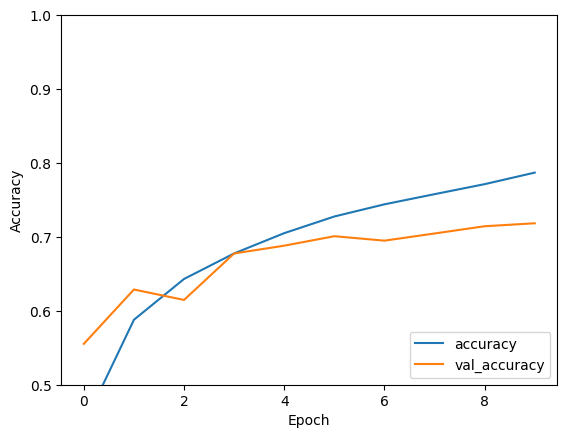

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
